# Data Preparation

## Build Enviornment

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
data = pd.read_csv('./0-Sample-Sales-Data.csv')

### Preivew Data

In [3]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

## Data Pre-Processing

### Rename Columns

In [7]:
data.columns = data.columns.str.lower()

In [8]:
col_map = {
    'ordernumber': 'order',
    'quantityordered': 'quantity',
    'priceeach': 'price',
    'orderlinenumber': 'line',
    'sales': 'sales',
    'orderdate': 'date',
    'status': 'status',
    'qtr_id': 'qtr',
    'month_id': 'month',
    'year_id': 'year',
    'productline': 'prod_line',
    'msrp': 'msrp',
    'productcode': 'prod_code',
    'customername': 'customer',
    'phone': 'phone',
    'addressline1': 'address1',
    'addressline2': 'address2',
    'city': 'city',
    'state': 'state',
    'postalcode': 'postal',
    'country': 'country',
    'territory': 'territory',
    'contactlastname': 'cont_name_last',
    'contactfirstname': 'cont_name_first',
    'dealsize': 'size'
}

In [9]:
data.rename(col_map, axis=1, inplace=True)
data.columns

Index(['order', 'quantity', 'price', 'line', 'sales', 'date', 'status', 'qtr',
       'month', 'year', 'prod_line', 'msrp', 'prod_code', 'customer', 'phone',
       'address1', 'address2', 'city', 'state', 'postal', 'country',
       'territory', 'cont_name_last', 'cont_name_first', 'size'],
      dtype='object')

### Feature Types

In [10]:
data['date'] = pd.to_datetime(data['date'])

## Missing Values

### Inspection

In [11]:
data.isna().sum()

order                 0
quantity              0
price                 0
line                  0
sales                 0
date                  0
status                0
qtr                   0
month                 0
year                  0
prod_line             0
msrp                  0
prod_code             0
customer              0
phone                 0
address1              0
address2           2521
city                  0
state              1486
postal               76
country               0
territory          1074
cont_name_last        0
cont_name_first       0
size                  0
dtype: int64

2823 total observations. Address 2 has 2521 missing values. These are probably suite numbers. Check for irregularities.

### Address Line 2

In [12]:
data.loc[data['address2'].notna(), 'address2'].value_counts()

Level 3        55
Suite 400      48
Level 6        46
Level 15       46
2nd Floor      36
Suite 101      25
Suite 750      20
Floor No. 4    16
Suite 200      10
Name: address2, dtype: int64

Second level addresses look clean.

### State

In [13]:
data.loc[data['state'].isna(), 'country'].value_counts()

Spain          342
France         314
UK             118
Italy          113
Finland         92
Norway          85
Singapore       79
Denmark         63
Germany         62
Sweden          57
Austria         55
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: country, dtype: int64

None of the observations with a missing state are in the United States. This looks ok. Check inverse.

In [14]:
data.loc[~data['state'].isna(), 'country'].value_counts().index

Index(['USA', 'Australia', 'Canada', 'Japan', 'UK'], dtype='object')

Check intersection between countries with and without a state.

In [15]:
set(data.loc[~data['state'].isna(), 'country'].value_counts().index).intersection(
    set(data.loc[data['state'].isna(), 'country'].value_counts().index)
)

{'UK'}

We have United Kingdom observations missing the state column.

In [16]:
data.loc[(data['country'] == 'UK') & (data['state'].notna())]

,order,quantity,price,line,sales,date,status,qtr,month,year,...,address1,address2,city,state,postal,country,territory,cont_name_last,cont_name_first,size
123,10316,33,100.00,17,4128.96,2004-11-01,Shipped,4,11,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Medium
569,10316,27,100.00,9,3704.13,2004-11-01,Shipped,4,11,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Medium
952,10316,21,94.62,15,1987.02,2004-11-01,Shipped,4,11,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Small
999,10232,22,100.00,6,3606.02,2004-03-20,Shipped,1,3,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Medium
1076,10232,48,95.80,8,4598.40,2004-03-20,Shipped,1,3,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Medium
1232,10316,47,86.81,14,4080.07,2004-11-01,Shipped,4,11,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Medium
1300,10232,23,89.53,5,2059.19,2004-03-20,Shipped,1,3,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Small
1530,10316,25,100.00,1,2872.25,2004-11-01,Shipped,4,11,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Small
1601,10232,46,100.00,4,5652.94,2004-03-20,Shipped,1,3,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Medium
1761,10316,34,63.71,10,2166.14,2004-11-01,Shipped,4,11,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Small


Looks like this is an edge case for the Isle of Wight. Will leave as is.

In [17]:
data.loc[data['postal'].isna()]

,order,quantity,price,line,sales,date,status,qtr,month,year,...,address1,address2,city,state,postal,country,territory,cont_name_last,cont_name_first,size
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
8,10201,22,98.57,2,2168.54,2003-12-01,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
46,10333,26,100.00,3,3003.00,2004-11-18,Shipped,4,11,2004,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Medium
50,10381,36,100.00,3,8254.80,2005-02-17,Shipped,1,2,2005,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Large
58,10159,37,100.00,17,5016.83,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,10159,23,100.00,12,2347.15,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Small
2436,10159,31,71.60,10,2219.60,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Small
2531,10384,49,100.00,1,6397.44,2005-02-23,Shipped,1,2,2005,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
2543,10209,33,88.71,4,2927.43,2004-01-09,Shipped,1,1,2004,...,6047 Douglas Av.,NaN,Los Angeles,CA,NaN,USA,NaN,Chandler,Michael,Small


### Postal Code

In [18]:
data.loc[data['postal'].isna(), ['address1', 'city']].value_counts()

address1                   city         
7734 Strong St.            San Francisco    41
5557 North Pendale Street  San Francisco    21
6047 Douglas Av.           Los Angeles      14
dtype: int64

In [19]:
# First
print(data.loc[data['address1'] == '6047 Douglas Av.', 'postal'].notna().sum())
# Second
print(data.loc[data['address1'] == '5557 North Pendale Street', 'postal'].notna().sum())
# Third
print(data.loc[data['address1'] == '6047 Douglas Av.', 'postal'].notna().sum())

0
0
0


Only missing 3 zip codes. Missing for all instances of the address. Will search the web for the zip codes, but could use a package like **geopy** to grab postal codes in a more "pythonic" fasion.

.. however, these addresses appear to be fictitious. So will impute using the mode postal for the respective city.

In [20]:
data[data['city'].isin(['San Francisco', 'Los Angeles'])].groupby(by='city').count()

,order,quantity,price,line,sales,date,status,qtr,month,year,...,phone,address1,address2,state,postal,country,territory,cont_name_last,cont_name_first,size
city,,,,,,,,,,,,,,,,,,,,,
Los Angeles,14,14,14,14,14,14,14,14,14,14,...,14,14,0,14,0,14,0,14,14,14
San Francisco,62,62,62,62,62,62,62,62,62,62,...,62,62,0,62,0,62,0,62,62,62


Looks like we dont have zip codes for any LA or SF customers. Will impute with a generic SF & LA zip.

In [21]:
data.loc[(data['city'] == 'San Francisco') & (data['postal'].isna()), 'postal'] = 94016
data.loc[(data['city'] == 'Los Angeles') & (data['postal'].isna()), 'postal'] = 90001

### Territory

In [22]:
data['territory'].value_counts()

EMEA     1407
APAC      221
Japan     121
Name: territory, dtype: int64

Territory aggregated by Country

In [23]:
data.groupby(by='territory')['country'].value_counts()

territory  country    
APAC       Australia      185
           Singapore       36
EMEA       Spain          342
           France         314
           UK             144
           Italy          113
           Finland         92
           Norway          85
           Denmark         63
           Germany         62
           Sweden          57
           Austria         55
           Belgium         33
           Switzerland     31
           Ireland         16
Japan      Japan           52
           Singapore       43
           Philippines     26
Name: country, dtype: int64

We have some misclassifications. Will combine Japan territory into APAC, as I assume that is Asia-Pacific.

In [24]:
data.loc[data['territory'].isna(), 'country'].value_counts()

USA       1004
Canada      70
Name: country, dtype: int64

Only North American Countries are missing a territory. Will create a 3rd category.

In [25]:
data.loc[data['territory']=='Japan', 'territory'] = 'APAC'
data['territory'] = data['territory'].fillna('AMER')

In [26]:
data.groupby(by='territory')['country'].value_counts()

territory  country    
AMER       USA            1004
           Canada           70
APAC       Australia       185
           Singapore        79
           Japan            52
           Philippines      26
EMEA       Spain           342
           France          314
           UK              144
           Italy           113
           Finland          92
           Norway           85
           Denmark          63
           Germany          62
           Sweden           57
           Austria          55
           Belgium          33
           Switzerland      31
           Ireland          16
Name: country, dtype: int64

Our territories looks much better now.

### Re-Inspection

In [27]:
data.isna().sum()

order                 0
quantity              0
price                 0
line                  0
sales                 0
date                  0
status                0
qtr                   0
month                 0
year                  0
prod_line             0
msrp                  0
prod_code             0
customer              0
phone                 0
address1              0
address2           2521
city                  0
state              1486
postal                0
country               0
territory             0
cont_name_last        0
cont_name_first       0
size                  0
dtype: int64

## Anomaly Detection

### Order

Order number range

In [28]:
print(data['order'].min())
print(data['order'].max())

10100
10425


### Quantity

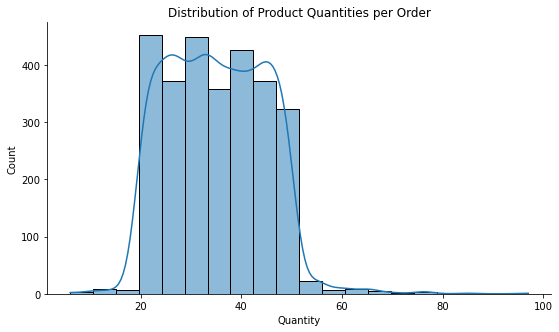

In [29]:
sns.displot(data['quantity'], bins=20, kde=True, height=4.5, aspect=1.75)
plt.title('Distribution of Product Quantities per Order')
plt.xlabel('Quantity');

Product quantity distribution as box plot with outliers

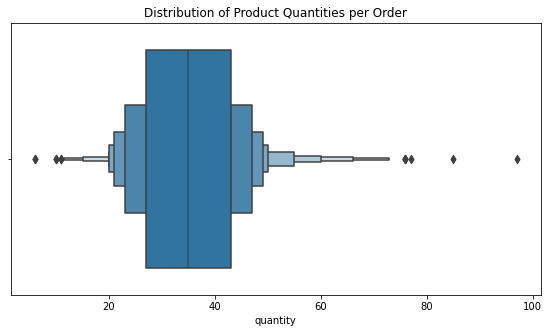

In [30]:
plt.figure(figsize=[9.5, 5])
sns.boxenplot(x=data['quantity'])
plt.title('Distribution of Product Quantities per Order');


Fairly normal distribution of order quantity with a few outliers containing large orders.

### Price

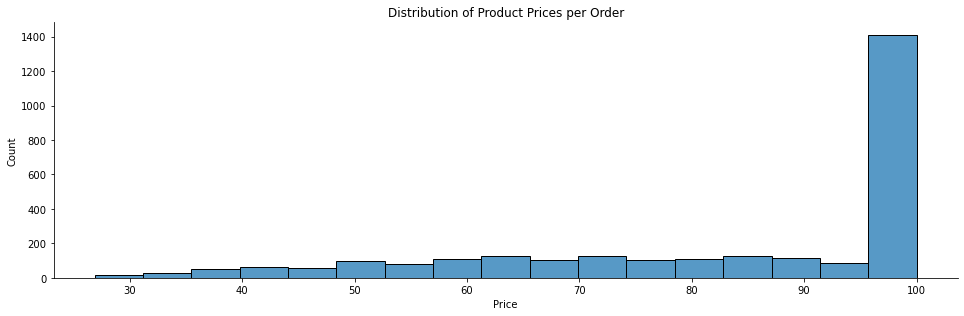

In [31]:
h = 4.5
w = h * 3
plt.figure(figsize=(w, h))
sns.histplot(data['price'], kde=False)
plt.title('Distribution of Product Prices per Order')
plt.xlabel('Price')
plt.tight_layout()
sns.despine();

Interesting distribution of items by price. Will need to dig in more. The distribution is quite abnormal in a situation where a normal distribution should likely exist. Take a deeper look at items sold with price 100 vs items not priced at 100.

In [32]:
# Redice df size for easy viewing
# Column names pertaining to products
cols_prod = ['order', 'quantity', 'price', 'line', 'sales', 'date', 'status', 'qtr', 'month', 'year', 'prod_line', 'msrp', 'prod_code', 'size']
# Column names pertaining to customers
cols_cust = ['order', 'customer', 'phone', 'address1', 'address2', 'city', 'state', 'postal', 'country', 'territory', 'cont_name_last', 'cont_name_first']

View data product sales data filtered by price

In [33]:
data[data['price'] != 100][cols_prod]

,order,quantity,price,line,sales,date,status,qtr,month,year,prod_line,msrp,prod_code,size
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Medium
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,Motorcycles,95,S10_1678,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,10315,40,55.69,5,2227.60,2004-10-29,Shipped,4,10,2004,Ships,54,S72_3212,Small
2816,10327,37,86.74,4,3209.38,2004-11-10,Resolved,4,11,2004,Ships,54,S72_3212,Medium
2817,10337,42,97.16,5,4080.72,2004-11-21,Shipped,4,11,2004,Ships,54,S72_3212,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,Small


Filter by product line

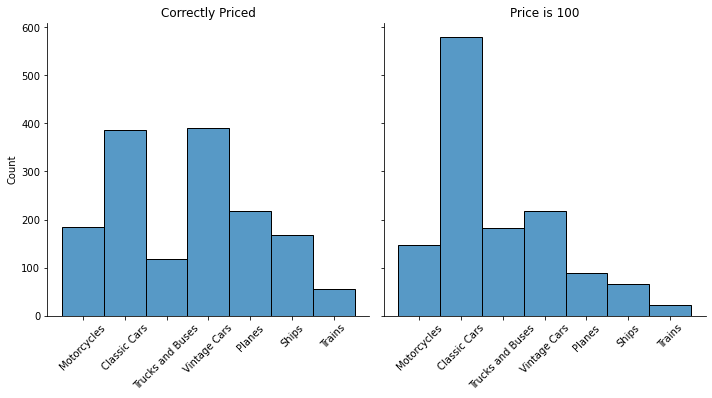

In [34]:
data['price_100'] = data['price'].map(lambda x: 'Price is 100' if x == 100 else 'Correctly Priced')
g = sns.displot(data=data, x='prod_line', col='price_100');
for col_val, ax in g.axes_dict.items():
    labs = []
    for l in ax.get_xticklabels():
        labs.append(l.get_text());
    ax.set_xticks(list(range(len(labs))))
    ax.set_xticklabels(labs, rotation=45)
    ax.set_xlabel('')
    ax.set_title(col_val)
plt.show()

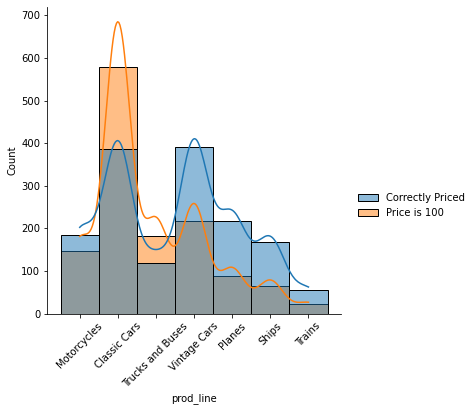

In [35]:
g = sns.displot(data=data, x='prod_line', hue='price_100', kde=True)
g._legend.set_title('')
g.set_xticklabels(rotation=45);

Could potentially be something here, but it could also be some randomness at play. Distributions are reasonably similar.

Filter price by date

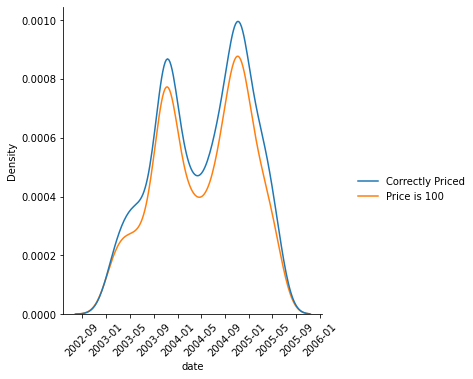

In [36]:
g = sns.displot(data=data, x='date', hue='price_100', kind='kde')
g._legend.set_title('')
g.set_xticklabels(rotation=45);

Nearly identical proportions.

Inspect Line feature against price oddity

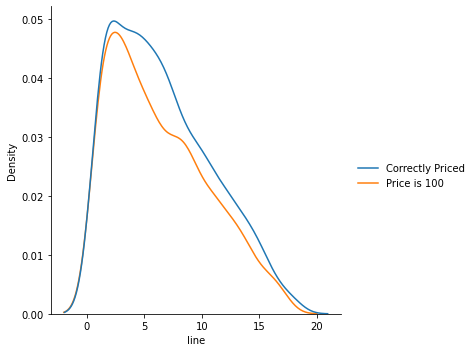

In [37]:
g = sns.displot(data=data, x='line', hue='price_100', kind='kde')
g._legend.set_title('')


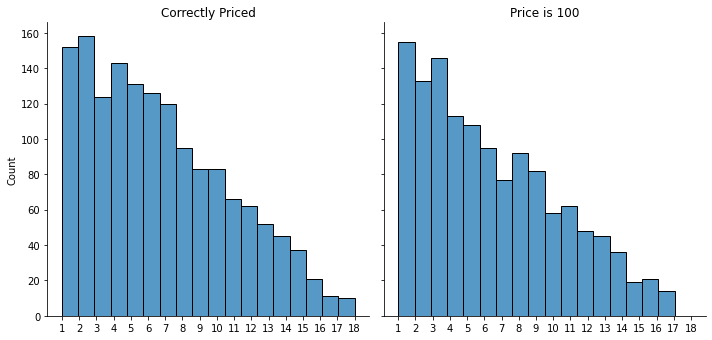

In [38]:
g = sns.displot(data=data, x='line', col='price_100', bins=data['line'].max());
for col_val, ax in g.axes_dict.items():

    for l in ax.get_xticklabels():
        ax.set_xticks(sorted(data['line'].unique()))
        ax.set_xticklabels(sorted(data['line'].unique()))
        ax.set_xlabel('')

    ax.set_title(col_val)

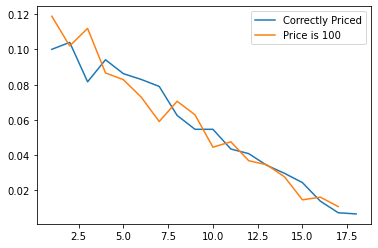

In [39]:
# data['line'].value_counts(normalize=True).sort_index().plot(label='unfiltered')
data[data['price'] != 100]['line'].value_counts(normalize=True).sort_index().plot(label='Correctly Priced')
data[data['price'] == 100]['line'].value_counts(normalize=True).sort_index().plot(label='Price is 100')
plt.legend();

Behavior is nearly identical regardless of stated price when aggregated by "Line."

Inspect by sales volume.

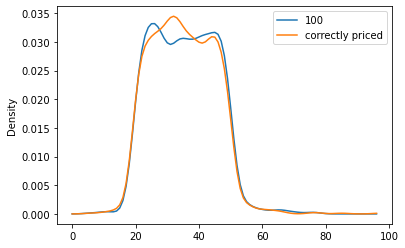

In [40]:
data[data['price'] == 100]['quantity'].plot(kind='kde', label='100', ind=list(range(0, max(data['quantity']))))
data[data['price'] != 100]['quantity'].plot(kind='kde', label='correctly priced', ind=list(range(0, max(data['quantity']))))
plt.legend();

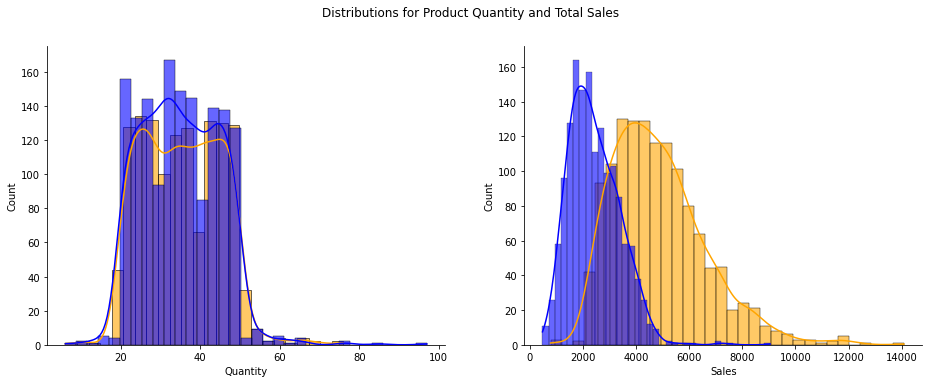

In [41]:
# select the columns to be plotted
cols = [
    [data[data['price']==100]['quantity'],
    data[data['price']!=100]['quantity']],
    [data[data['price']==100]['sales'],
    data[data['price']!=100]['sales']]]

# create the figure and axes
fig, axes = plt.subplots(1, 2)
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=col[0], stat='count', kde=True, ax=ax, alpha=.6, color='orange')
    sns.histplot(data=col[1], stat='count', kde=True, ax=ax, color='blue', alpha=.6, legend=True)
    ax.set_xlabel(col[0].name.title())

h = 5.5
fig.set_size_inches(h*2.85, h)
plt.suptitle('Distributions for Product Quantity and Total Sales')
sns.despine()
plt.show()

In [42]:
data['calc_ppu'] = data['sales'] / data['quantity']

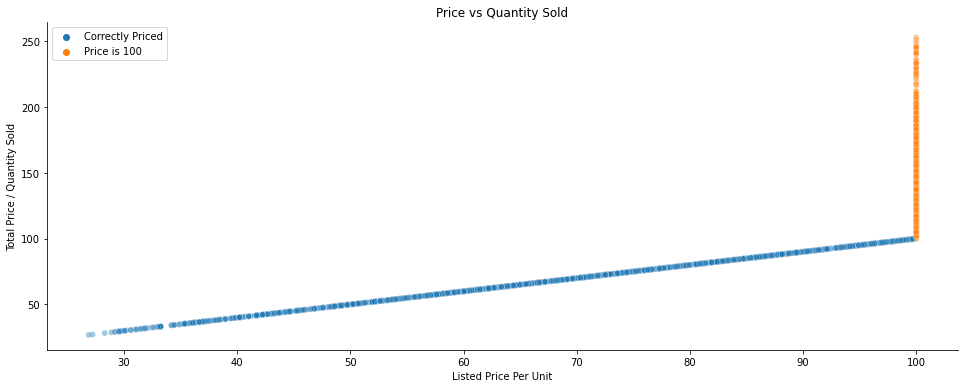

In [43]:
plt.figure(figsize=(w, h))
sns.scatterplot(data=data, x='price', y='calc_ppu', hue='price_100', alpha=.4)
plt.legend(title='', loc='upper left')
plt.ylabel('Total Price / Quantity Sold')
plt.xlabel('Listed Price Per Unit')
plt.title('Price vs Quantity Sold')
plt.tight_layout()
sns.despine()


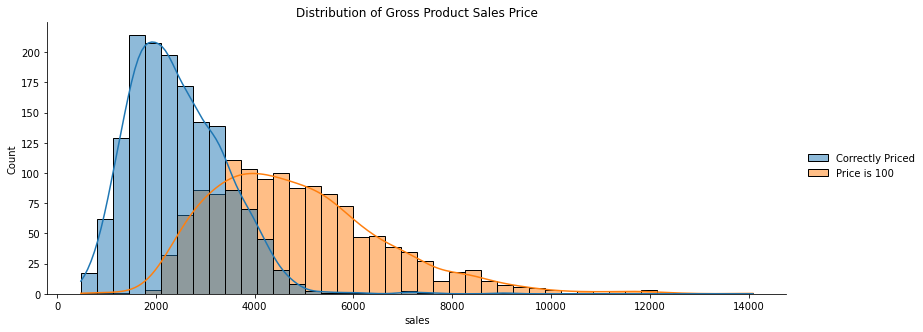

In [44]:
g = sns.displot(data=data, x='sales', hue='price_100', kde=True, height=4.5, aspect=2.5)
g._legend.set_title('')
plt.title('Distribution of Gross Product Sales Price');

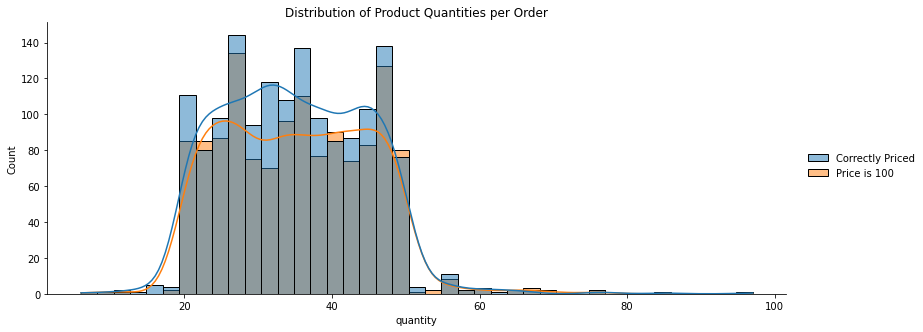

In [45]:
g = sns.displot(data=data, x='quantity', hue='price_100', kde=True, height=4.5, aspect=2.5)
g._legend.set_title('')
plt.title('Distribution of Product Quantities per Order');

The last charts start to tell the story of what is happening. Products with a price of exactly 100 are disproportionately selling for a higher total price. Given the product quantity distributions for products priced at exactly 100 and not priced at 100 are very similar, it is reasonable to expect the total sales price distributions to follow the same pattern.

Check how often quantity * price is equal to the sales column

In [46]:
(data['quantity'] * data['price'] == data['sales']).value_counts(normalize=True)

False    0.601134
True     0.398866
dtype: float64

A large proportion of orders are affected by this data collection error.

In [47]:
# find the proportion of orders made where the quantity * the price, where price = 100, is the same as the sales amount.
(data[data['price'] == 100]['quantity'] * data[data['price'] == 100]['price'] == data[data['price'] == 100]['sales']).value_counts(normalize=True)

False    1.0
dtype: float64

In all cases where the price per unit is exactly 100, the quantity multiplied by the price does not equal the total sales price.

Unlikely company has made a sale with a price per unit of exactly 100.

In [48]:
# find the proportion of orders made where the quantity * the price, where price != 100, is the same as the sales amount. (rounded to 2 decimals)
(np.round(data[data['price'] != 100]['quantity'] * data[data['price'] != 100]['price'],2) == np.round(data[data['price'] != 100]['sales'], 2)).value_counts(normalize=True)

True    1.0
dtype: float64

In all the cases where the price per unit is not equal to exactly 100 the quantity multipled by the price is exactly equal to the total sales price.

Will adjust the price per unit column to match the sales/quantity.

In [49]:
print(data['price'])
data['price'] = np.round(data['sales'] / data['quantity'], 2)
data['price']

0        95.70
1        81.35
2        94.74
3        83.26
4       100.00
         ...  
2818    100.00
2819    100.00
2820    100.00
2821     62.24
2822     65.52
Name: price, Length: 2823, dtype: float64


0        95.70
1        81.35
2        94.74
3        83.26
4       106.23
         ...  
2818    112.22
2819    137.19
2820    125.99
2821     62.24
2822     65.52
Name: price, Length: 2823, dtype: float64

Looking good now.

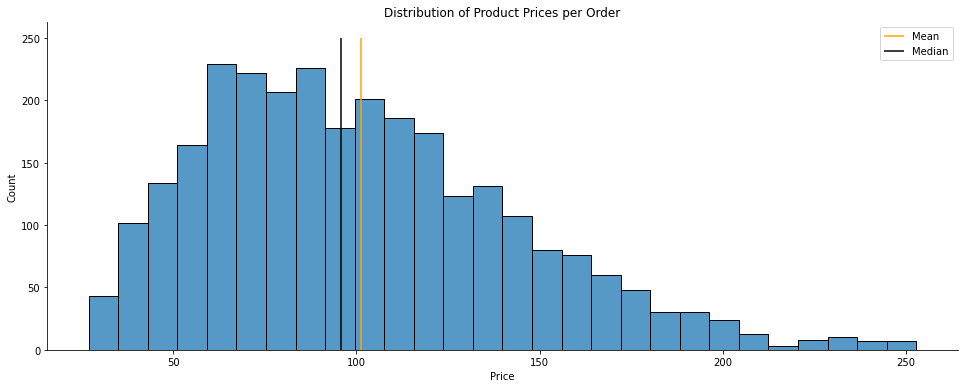

In [50]:
plt.figure(figsize=(w, h))
sns.histplot(data['price'], kde=False)
plt.vlines(x=data['price'].mean(), ymin=0, ymax=250, color='orange', label='Mean')
plt.vlines(x=data['price'].median(), ymin=0, ymax=250, color='black', label='Median')
plt.legend()
plt.title('Distribution of Product Prices per Order')
plt.xlabel('Price')
plt.tight_layout()
sns.despine();

Distribution of orders by price is looking much more normal.

### Line

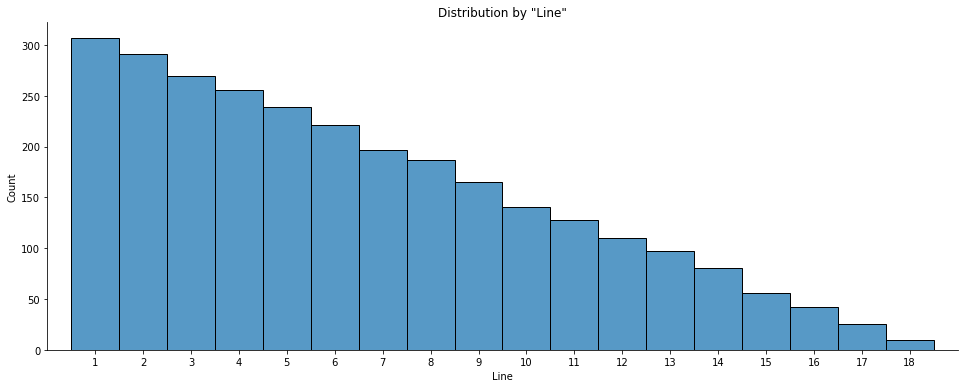

In [51]:
plt.figure(figsize=(w, h))
sns.histplot(pd.Series(sorted(data['line']), dtype=str), kde=False, bins=18)
plt.xlim(-1, 18)
plt.title('Distribution by "Line"')
plt.xlabel('Line')
plt.tight_layout()
sns.despine();

Volume decreases with the increase of the 'line'. Unclear what exactly line is measuring. Possibly a manufacturing line? Difficult to draw conclusions without a data dictionary. In any case, there is a clear pattern to the data. Leads me to beleive it is behaving as intended with no obvious errors.

### Sales

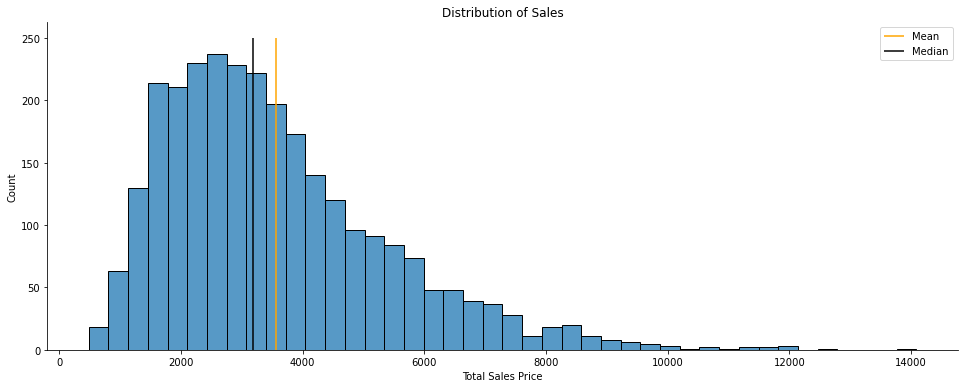

In [52]:
plt.figure(figsize=(w, h))
sns.histplot(data['sales'], kde=False)
plt.vlines(x=data['sales'].mean(), ymin=0, ymax=250, color='orange', label='Mean')
plt.vlines(x=data['sales'].median(), ymin=0, ymax=250, color='black', label='Median')
plt.legend()
plt.title('Distribution of Sales')
plt.xlabel('Total Sales Price')
plt.tight_layout()
sns.despine();
print()

Right tailed distribution for sales. Looks "normal" enough

In [53]:
data.drop(['price_100', 'calc_ppu'], axis='columns', inplace=True)

### Date

Isolate volumn of orders per day.

In [54]:
dates = pd.date_range(start=data['date'].min(), end=data['date'].max())
dates = pd.Series(np.zeros_like(dates.to_list()), index=dates, name='order')

not_cancelled = ['Shipped', 'Disputed', 'In Process', 'Resolved']
disputed = ['Disputed', 'Cancelled', 'Resolved']

Aggregate rolling orders per day data by week, month, quarter, year

In [55]:
# Combines empty dates series with aggregated number of orders per day. Empty dates are for days with 0 orders
data_daily_roll = pd.merge(left=dates, right=data[data['status'].isin(not_cancelled)].set_index('date').groupby('date')['order'].apply(lambda x: len(np.unique(x))), left_index=True, right_index=True, how='left')['order_y'].fillna(0).astype(int)

# Aggregate rolling order volume by week, month, 3 month, and year
data_daily_roll = data_daily_roll.to_frame().rename({'order_y': 'orders'}, axis=1)
data_daily_roll['orders_roll_7'] = data_daily_roll['orders'].rolling(window=7).mean().fillna(0).to_frame()
data_daily_roll['orders_roll_30'] = data_daily_roll['orders'].rolling(window=30).mean().fillna(0).to_frame()
data_daily_roll['orders_roll_90'] = data_daily_roll['orders'].rolling(window=90).mean().fillna(0).to_frame()
data_daily_roll['orders_roll_365'] = data_daily_roll['orders'].rolling(window=365).mean().fillna(0).to_frame()


Orders per day

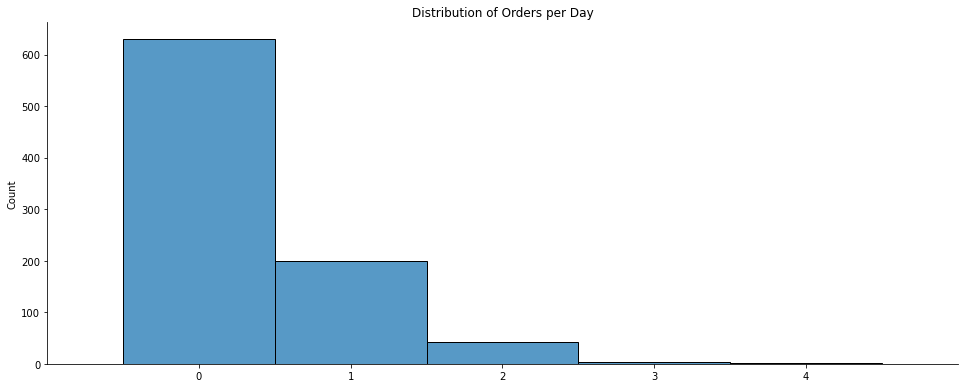

In [56]:
plt.figure(figsize=(w, h))
sns.histplot(pd.Series(sorted(data_daily_roll['orders']), dtype=str), kde=False, bins=max(data_daily_roll['orders']))
plt.xlim(-1, max(data_daily_roll['orders']) + 1)
plt.title('Distribution of Orders per Day')
plt.xlabel('')
plt.tight_layout()
sns.despine();

Dictionaries for plot formatting

In [57]:
color_dict = {
    '1day': '#DDCC77',
    '7day': '#882255',
    '30day': 'blue',
    '90day': 'orange',
    '365day': 'green',
}
# Colorblind friendly palette

labels_metric = {
}


Rolling average number of daily orders

In [58]:
def plot_lines(metric, period_start=0, period_end='end'):
    """Plot trend lines for metric over periods. Periods include [1, 7, 30, 90, 365]"""

    periods = [1, 7, 30, 90, 365]
    if period_end == 'end':
        period_end = len(periods)
    else:
        if period_end > len(periods):
            period_end = len(periods)

    # Inistantiate Figure
    plt.figure(figsize=(w, h))

    # Trend lines
    min_period = np.inf
    for period in periods[period_start:period_end]:
        if period == 1:
            sns.lineplot(data=data_daily_roll[metric], color=color_dict[f'{period}day'])    
        else:
            sns.lineplot(data=data_daily_roll.loc[(data_daily_roll[f'{metric}_roll_{period}'] != 0).idxmax():,f'{metric}_roll_{period}'], color=color_dict[f'{period}day'])
        if period < min_period:
            min_period = period

    # Add quarterly breaks
    if min_period == 1:
        new_date = pd.to_datetime(str(data_daily_roll.index[0].year) + '-1-1')    # get minimum quarterly line from index of smallest period
        upper_bound = data_daily_roll[metric].max() + (data_daily_roll[metric].max() * .02)   # get maximum height + 2% of smallest period
    else:
        new_date = pd.to_datetime(str((data_daily_roll[f'{metric}_roll_{min_period}'] != 0).idxmax().year) + '-1-1')    # get minimum quarterly line from index of smallest period
        upper_bound = data_daily_roll[f'{metric}_roll_{min_period}'].max() + (data_daily_roll[f'{metric}_roll_{min_period}'].max() * .02)   # get maximum height + 2% of smallest period
    
    while new_date < data_daily_roll.index.max():
        plt.vlines(x=new_date, ymin=0, ymax=upper_bound, colors='gray', alpha=.3)
        new_date += pd.DateOffset(months=3)

    # Build and label figure
    plt.ylim((0, upper_bound))

    if min_period == 1:
        plt.xlim(data_daily_roll.index[0], data_daily_roll.index[-1])
    else:
        plt.xlim(((data_daily_roll[f'{metric}_roll_{min_period}'] != 0).idxmax(), data_daily_roll.index[-1]))
    
    plt.legend(labels=[f'{period} day' for period in periods[period_start:period_end]])

    plt.title(f'{labels_metric[metric]} Rolling Average')
    plt.xlabel('')
    plt.ylabel(labels_metric[metric])
    plt.tight_layout()
    sns.despine()
    plt.show();

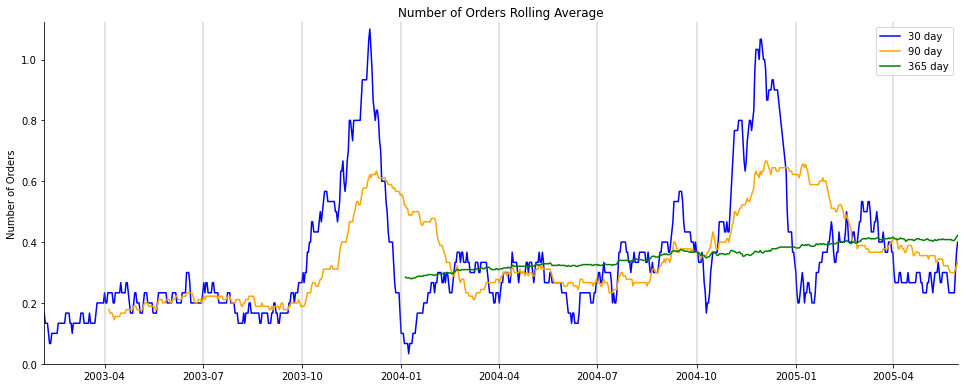

In [59]:
metric = 'orders'
labels_metric[metric] = 'Number of Orders'
plot_lines(metric, period_start=2)

First day of data per rolling average

In [60]:
start_dates = (data_daily_roll != 0).idxmax()
start_dates

orders            2003-01-06
orders_roll_7     2003-01-12
orders_roll_30    2003-02-04
orders_roll_90    2003-04-05
orders_roll_365   2004-01-05
dtype: datetime64[ns]

Year over year changes

In [61]:
data_daily_roll.loc[start_dates['orders_roll_7']:, 'orders_yoy_roll_7'] = data_daily_roll.loc[start_dates['orders_roll_7']:, 'orders_roll_7'].pct_change(366)
data_daily_roll.loc[start_dates['orders_roll_30']:, 'orders_yoy_roll_30'] = data_daily_roll.loc[start_dates['orders_roll_30']:, 'orders_roll_30'].pct_change(366)
data_daily_roll.loc[start_dates['orders_roll_90']:, 'orders_yoy_roll_90'] = data_daily_roll.loc[start_dates['orders_roll_90']:, 'orders_roll_90'].pct_change(366)
data_daily_roll.loc[start_dates['orders_roll_365']:, 'orders_yoy_roll_365'] = data_daily_roll.loc[start_dates['orders_roll_365']:, 'orders_roll_365'].pct_change(366)
data_daily_roll.fillna(0, inplace=True)

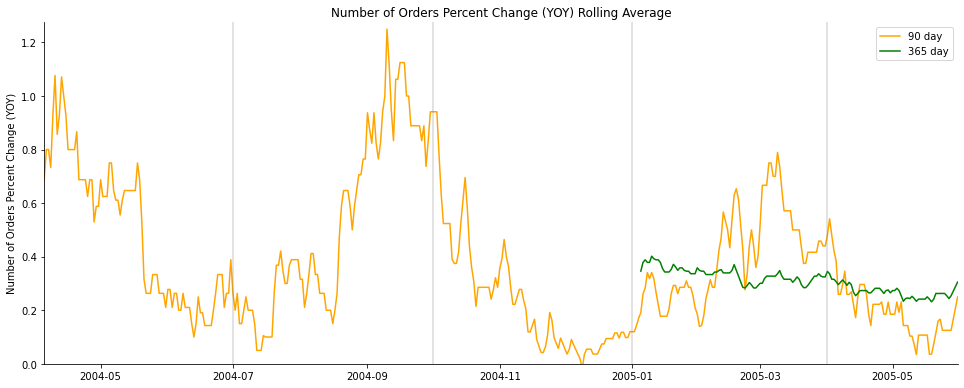

In [62]:
metric = 'orders_yoy'
labels_metric[metric] = 'Number of Orders Percent Change (YOY)'
plot_lines(metric, period_start=3)

### Status

Proportion of orders by status

In [63]:
data.groupby(['order', 'status']).count().reset_index()[['order', 'status']].set_index('order')['status'].value_counts(normalize=True)

Shipped       0.931596
In Process    0.019544
Resolved      0.013029
Cancelled     0.013029
On Hold       0.013029
Disputed      0.009772
Name: status, dtype: float64

### Quarter

Distribution of product orders by quarter.

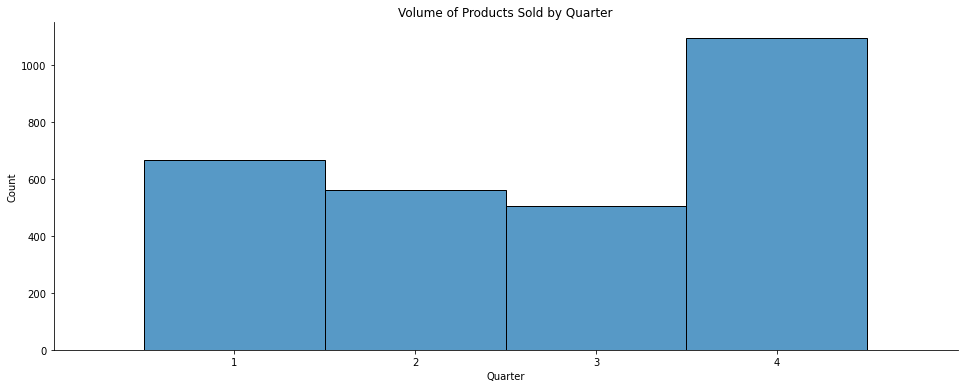

In [64]:
plt.figure(figsize=(w, h))
sns.histplot(pd.Series(sorted(data['qtr']), dtype=str), kde=False, bins=4)
plt.xlim(-1, max(data['qtr']))
plt.title('Volume of Products Sold by Quarter')
plt.xlabel('Quarter')
plt.tight_layout()
sns.despine();

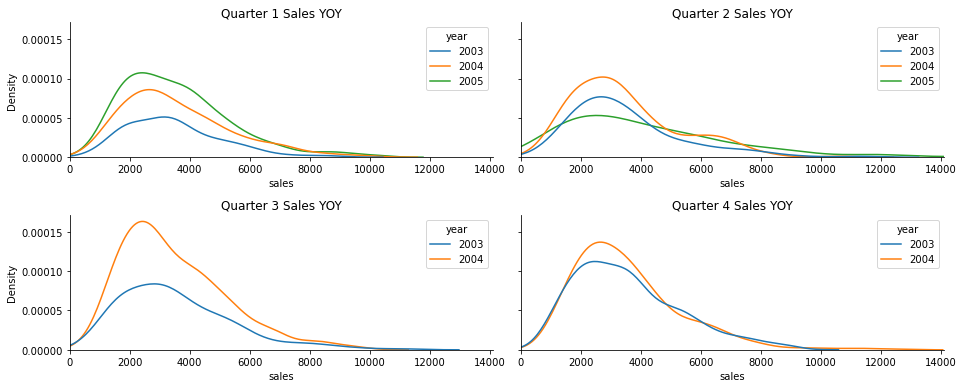

In [65]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(w, h), sharey=True)

qtr = 0
for ax in (ax1, ax2, ax3, ax4):
    qtr += 1
    sns.kdeplot(data=data[data['qtr']==qtr], x='sales', hue='year', ax=ax, palette=sns.color_palette("tab10", len(data[data['qtr']==qtr]['year'].unique())))
    ax.set_xlim((0, max(data['sales'])))
    ax.set_title(f'Quarter {qtr} Sales YOY')
plt.tight_layout()
sns.despine()

*Q2 2005 data incomplete

Gross sales are increasing year over year.

### Month

Distribution of products sold by month

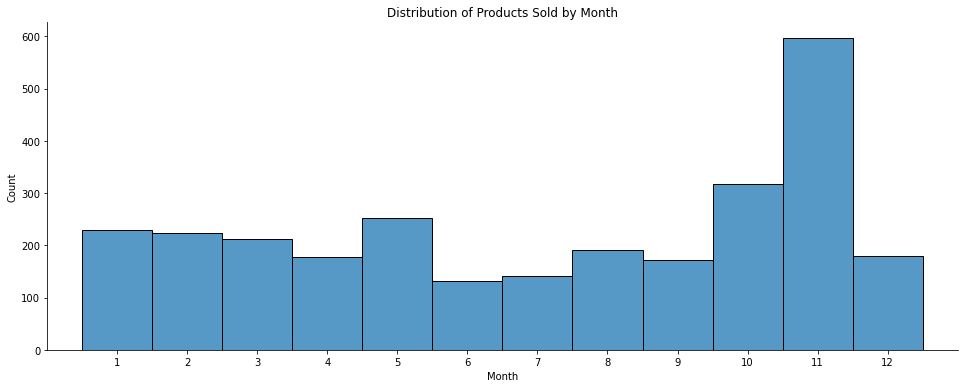

In [66]:
plt.figure(figsize=(w, h))
sns.histplot(pd.Series(sorted(data['month']), dtype=str), kde=False, bins=12)
plt.xlim(-1, max(data['month']))
plt.title('Distribution of Products Sold by Month')
plt.xlabel('Month')
plt.tight_layout()
sns.despine();

Aggregate sales by year and month.

In [67]:
monthly = data.groupby(['year', 'month'])['sales'].sum().reset_index(drop=False).astype(int)

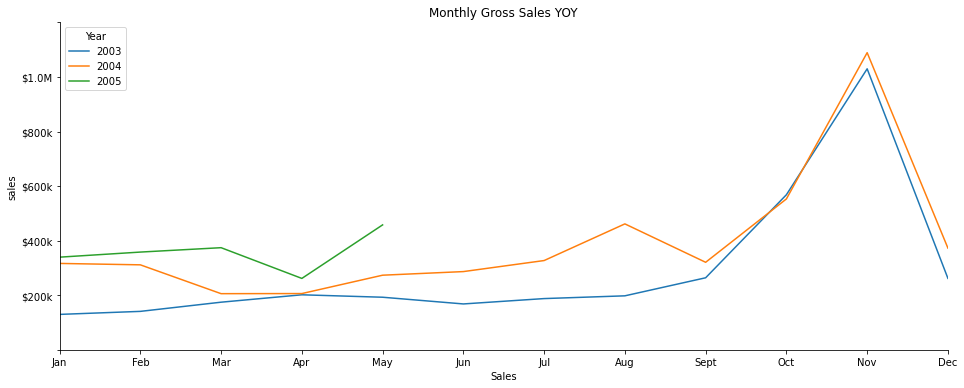

In [68]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# Instantiate Figure
plt.figure(figsize=(w, h))

# Draw lines
sns.lineplot(data=data.groupby(['year', 'month'])['sales'].sum().reset_index(drop=False).astype(int), x='month', y='sales', hue='year', 
             palette=sns.color_palette("tab10", len(data['year'].unique())))

# Set Axis
plt.ylim(0, ((monthly['sales'].max()//1000) + 10) * 1000)
plt.xlim(1, 12)
plt.xticks(ticks=list(range(1, 13)), labels=months)
plt.yticks(ticks=plt.gca().get_yticks(), labels=['', '$200k', '$400k', '$600k', '$800k', '$1.0M', ''])

# Label Chart
plt.xlabel('Sales')
plt.title('Monthly Gross Sales YOY')
plt.legend(title='Year')
plt.tight_layout()
sns.despine();

Sales are following a consistent seasonal trend.

### Year

Distribution of products sold by year (2015 is incomplete)

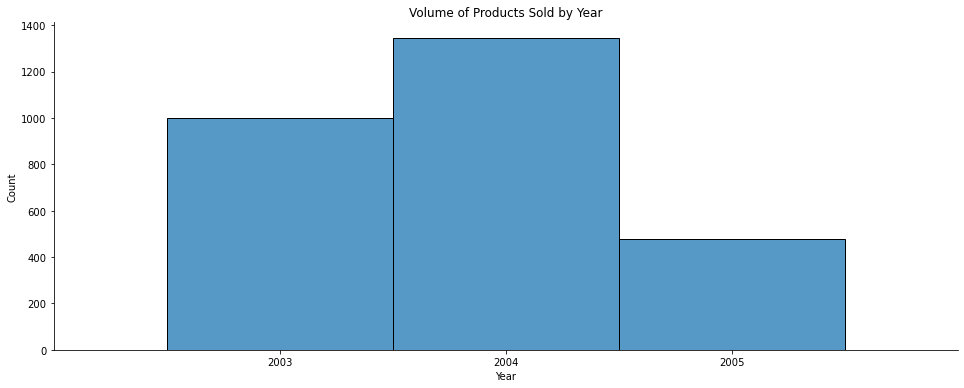

In [69]:
plt.figure(figsize=(w, h))
sns.histplot(pd.Series(sorted(data['year']), dtype=str), kde=False, bins=3)
plt.xlim(-1, len(np.unique(data['year'])))
plt.title('Volume of Products Sold by Year')
plt.xlabel('Year')
plt.tight_layout()
sns.despine();

** 2015 data incomplete

Products sold is increasing year over year.

### Product Line

Proportion of orders by product line

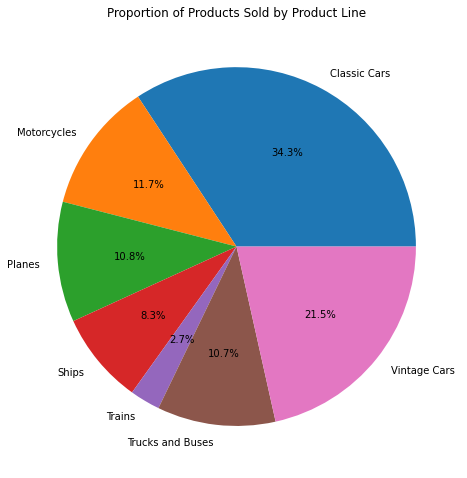

In [70]:
plt.figure(figsize=[h*1.5, h*1.5])
plt.title('Proportion of Products Sold by Product Line')
plt.pie(x=data['prod_line'].value_counts().sort_index(), labels=data['prod_line'].value_counts().sort_index().index, autopct='%1.1f%%');

Proportion of gross sales by product line

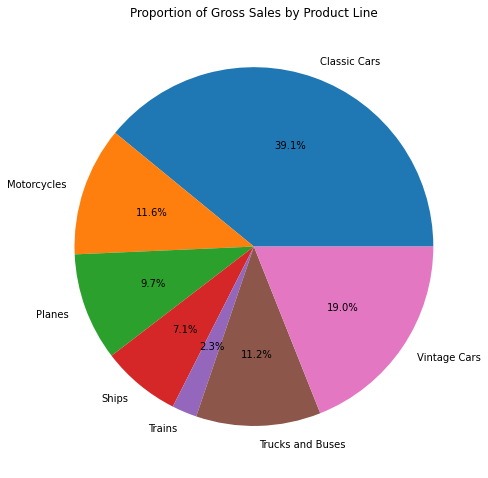

In [71]:
plt.figure(figsize=[h*1.5, h*1.5])
plt.title('Proportion of Gross Sales by Product Line')
plt.pie(x=data.groupby('prod_line')['sales'].sum().sort_index(), labels=data.groupby('prod_line')['sales'].sum().sort_index().index, autopct='%1.1f%%');

### MSRP

Smoothed distribution of products sold by MSRP.

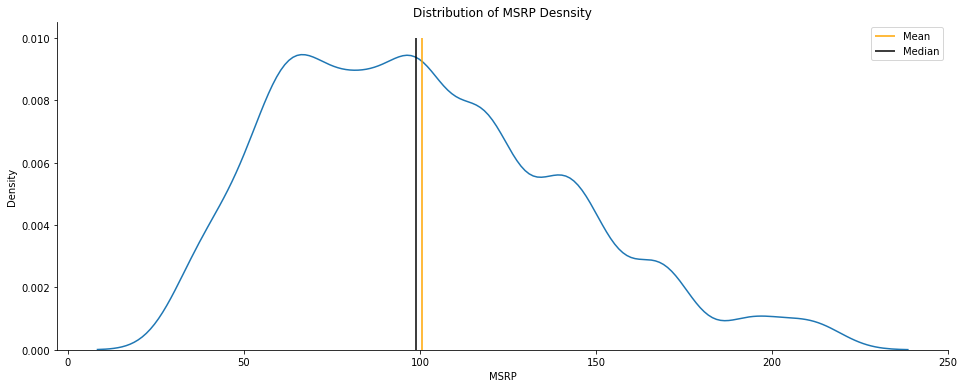

In [72]:
plt.figure(figsize=(w, h))
# sns.histplot(data['msrp'], kde=True)
sns.kdeplot(data['msrp'])
plt.vlines(x=data['msrp'].mean(), ymin=0, ymax=.01, color='orange', label='Mean')
plt.vlines(x=data['msrp'].median(), ymin=0, ymax=.01, color='black', label='Median')
plt.legend()
plt.title('Distribution of MSRP Desnsity')
plt.xlabel('MSRP')
plt.tight_layout()
sns.despine();

### Relative Order Size

Distribution of relative order sizes.

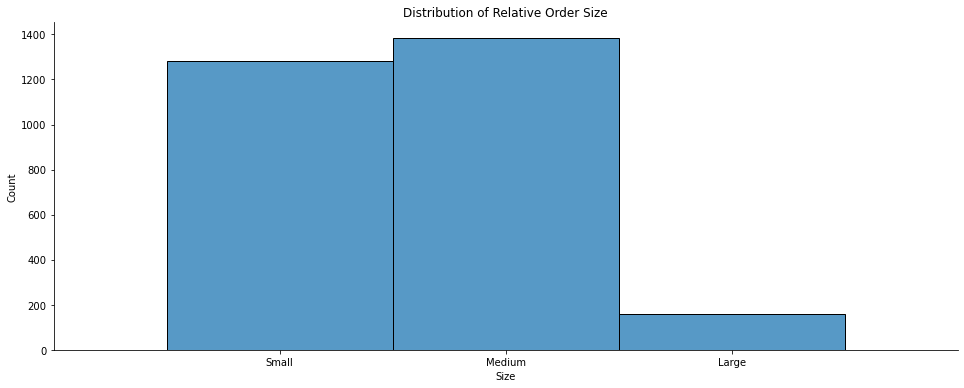

In [73]:
plt.figure(figsize=(w, h))
sns.histplot(pd.Series(sorted(data['size'], reverse=True), dtype=str), kde=False, bins=3)
plt.xlim(-1, len(np.unique(data['size'])))
plt.title('Distribution of Relative Order Size')
plt.xlabel('Size')
plt.tight_layout()
sns.despine();

### Territory

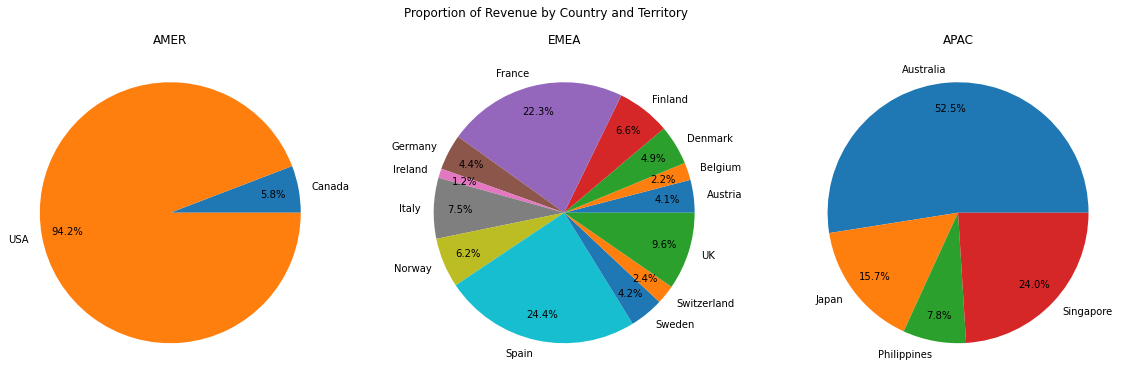

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
ters = data['territory'].unique()
ax1.pie(x=data[data['territory']==ters[0]].groupby('country')['sales'].sum().astype(int), labels=data[data['territory']==ters[0]].groupby('country')['sales'].sum().index, autopct='%1.1f%%', pctdistance=.8)
ax1.set_title(ters[0])
ax2.pie(x=data[data['territory']==ters[1]].groupby('country')['sales'].sum().astype(int), labels=data[data['territory']==ters[1]].groupby('country')['sales'].sum().index, autopct='%1.1f%%', pctdistance=.8)
ax2.set_title(ters[1])
ax3.pie(x=data[data['territory']==ters[2]].groupby('country')['sales'].sum().astype(int), labels=data[data['territory']==ters[2]].groupby('country')['sales'].sum().index, autopct='%1.1f%%', pctdistance=.8)
ax3.set_title(ters[2])
fig.suptitle('Proportion of Revenue by Country and Territory')
plt.show();


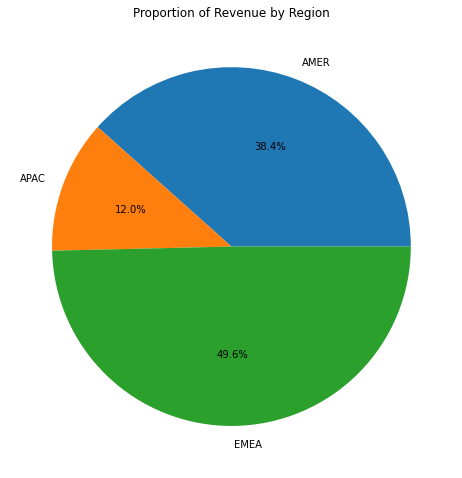

In [75]:
plt.figure(figsize=[h*1.5, h*1.5])
plt.title('Proportion of Revenue by Region')
plt.pie(x=data.groupby('territory')['sales'].sum().astype(int), labels=data.groupby('territory')['sales'].sum().index, autopct='%1.1f%%');

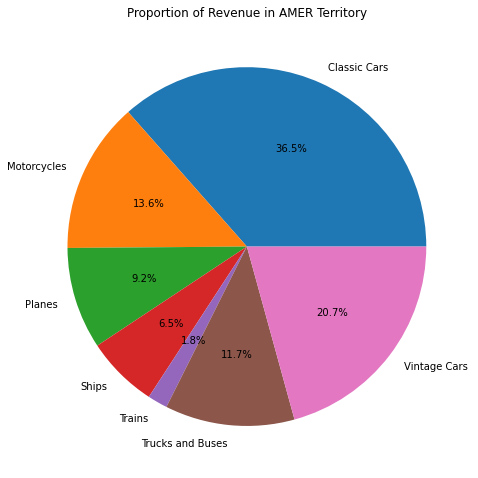

In [76]:
plt.figure(figsize=[h*1.5, h*1.5])
plt.title('Proportion of Revenue in AMER Territory')
plt.pie(x=data[data['territory']=='AMER'].groupby('prod_line')['sales'].sum().astype(int), labels=data[data['territory']=='AMER'].groupby('prod_line')['sales'].sum().index, autopct='%1.1f%%');

In [77]:
_ = pd.DataFrame(index=data.groupby(['year', 'qtr']).count().index).reset_index(drop=False)

territory = pd.DataFrame()
for ter in data['territory'].unique():
    _['territory'] = ter

    territory = pd.concat([territory, _], axis=0)
territory.set_index(['territory', 'year', 'qtr'], inplace=True)

In [78]:
territory = pd.merge(left=territory, right=data.groupby(['territory', 'year', 'qtr'])['sales'].sum(), how='left', left_index=True, right_index=True)
territory.reset_index(drop=False, inplace=True)
territory['sales'].fillna(0, inplace=True)
territory['sales'] = territory['sales'].astype(int)

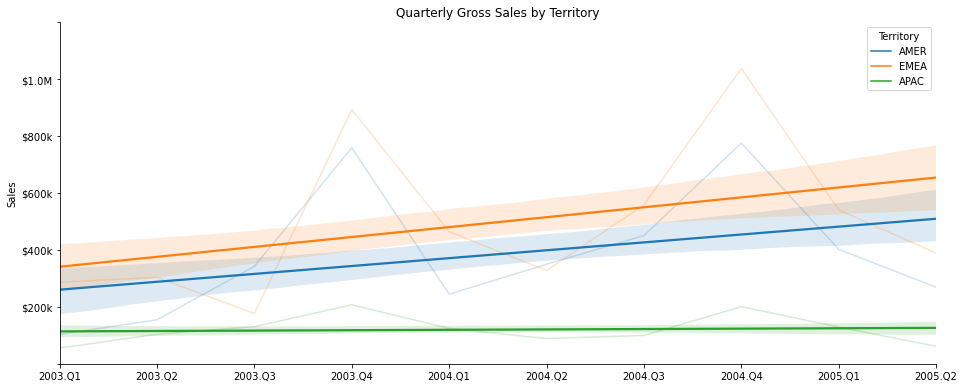

In [79]:
qtrs = (territory[territory['territory']=='AMER']['year'].astype(str) + '.Q' + territory[territory['territory']=='AMER']['qtr'].astype(str)).to_list()
qtrs = qtrs + qtrs + qtrs

plt.figure(figsize=(w, h))
# Draw lines
sns.lineplot(data=territory, x=qtrs, y='sales', hue='territory', 
            palette=sns.color_palette("tab10", 
            len(data['territory'].unique())), 
            alpha=.2)
sns.regplot(x=list(range(0, 10)), y=territory[territory['territory']=='AMER']['sales'], ci=50, scatter=False, color=sns.color_palette("tab10")[0])
sns.regplot(x=list(range(0, 10)), y=territory[territory['territory']=='EMEA']['sales'], ci=50, scatter=False, color=sns.color_palette("tab10")[1])
sns.regplot(x=list(range(0, 10)), y=territory[territory['territory']=='APAC']['sales'], ci=50, scatter=False, color=sns.color_palette("tab10")[2])

# Set Axis
plt.xlim(0, len(plt.gca().get_yticks()))
plt.ylim(0, ((territory['sales'].max()//1000) + 10) * 1000)
plt.xticks(ticks=list(range(len(qtrs)//3)), labels=qtrs[:10])
plt.yticks(ticks=plt.gca().get_yticks(), labels=['', '$200k', '$400k', '$600k', '$800k', '$1.0M', ''])

# Label Chart
plt.ylabel('Sales')
plt.title('Quarterly Gross Sales by Territory')
plt.legend(title='Territory')
plt.tight_layout()
sns.despine();

## Pending Sales Discount Rate

Given the history of the sales lifecyle, it can safely be assumed that a certain percentage of orders will be disputed and/or canceled.

In [80]:
data.groupby(['order', 'status']).count().reset_index()[['order', 'status']].set_index('order')['status'].value_counts(normalize=True)

Shipped       0.931596
In Process    0.019544
Resolved      0.013029
Cancelled     0.013029
On Hold       0.013029
Disputed      0.009772
Name: status, dtype: float64

In [81]:
data[data['status']!='Shipped'].groupby(['order', 'status']).count().reset_index()[['order', 'status']].set_index('order')['status']

order
10164      Resolved
10167     Cancelled
10248     Cancelled
10253     Cancelled
10262     Cancelled
10327      Resolved
10334       On Hold
10367      Resolved
10386      Resolved
10401       On Hold
10406      Disputed
10407       On Hold
10414       On Hold
10415      Disputed
10417      Disputed
10420    In Process
10421    In Process
10422    In Process
10423    In Process
10424    In Process
10425    In Process
Name: status, dtype: object

Assumption: lifecycle of a sale appears to be consistent. Orders are Shipped (sold), if there is an issue, the order can be Disputed. Once Disputed, orders will be Cancelled or Resolved. Additionally, making the assumption that orders On Hold are a supply chain issue and should be ommitted as it is unclear if they will be Sold or Cancelled. Could analyse in more depth with more data or context about the current data.

To estimate the discount rate at which "In Process" orders should be reduced, we will first need to take a look at the rate orders are Cancelled or Resolved vs Shipped. If an order is recorded as Shipped, the assumption being made is the order lifecycle has been completed. Data is not available on how long shipped orders can be disputed, if at all. Resolved and Cancelled orders would have previously been Disputed proior to their final classification of either "Cancelled" or "Resolved."

First, the data will need to be aggregated by order status.

In [82]:
order_status = data.groupby(['order', 'status']).count().reset_index()[['order', 'status']].set_index('order')['status'].value_counts()
order_status

Shipped       286
In Process      6
Resolved        4
Cancelled       4
On Hold         4
Disputed        3
Name: status, dtype: int64

### Dispute Rate

Dispute Rate = (Resolved + Cancelled) / (Resolved + Cancelled + Shipped)

In [83]:
dispute_rate = sum(order_status.loc[['Resolved', 'Cancelled']]) / sum(order_status.loc[['Resolved', 'Cancelled', 'Shipped']])
print(f'Dispute Rate: {np.round(dispute_rate*100, 2)}%')

Dispute Rate: 2.72%


Note: Sample size is too small to accurately test if products being disputed are a random sample of total products sold or if specific products are more likely to be disputed than others.

The assumption moving forward is 2.72% of "In Process" orders will be disputed.

Next, we will find the rate at which Disputed orders are either Resolved or Cancelled.

### Cancellation Rate

Cancellation Rate = Cancelled / (Resolved + Cancelled)

In [84]:
cancel_rate = order_status.loc['Cancelled'] / sum(order_status.loc[['Resolved', 'Cancelled']])
print(f'Cancellation Rate: {np.round(cancel_rate*100, 2)}%')

Cancellation Rate: 50.0%


Historically, 50% of Disputed orders were not successfully resolved and were cancelled.

To find the appropriate discount rate for In Process orders, the Dispute Rate will be multiplied by the Cancellation Rate.

Discount Rate = Dispute Rate * Cancellation Rate

In [85]:
discount_rate = dispute_rate * cancel_rate
print(f'Disscount Rate: {np.round(discount_rate*100, 2)}%')

Disscount Rate: 1.36%


The sample size in this data set is quite small, but further analysis can be done to track this rate year over year to see if the manufacturing leg and/or the customer support team is improving. Typically to have an approprate sample size with a confidence interval of 95%, the rule of thumb is (x / n) * n > 5 and (1 - (x/n)) * n > 5

### Adjusted Sales

Adjusted sales can be estimated by applying the discount rate calculated above to orders currently "In Process." Sales for orders with a status of "Disputed" can be estimated by applying the cancellation rate. Reducing sales by a discounted rate will more accurately represent the projections of sales in the immediate future.

Adjusted Sales =  Sales * (1 - discount rate)

In [86]:
data['adj_sales'] = data['sales']
data.loc[data['status'] == 'In Process', 'adj_sales'] = data.loc[data['status'] == 'In Process', 'adj_sales'].apply(lambda x: x * (1 - discount_rate))
data.loc[data['status'] == 'Disputed', 'adj_sales'] = data.loc[data['status'] == 'Disputed', 'adj_sales'].apply(lambda x: x * (1 - cancel_rate))
data.loc[data['status'] == 'Cancelled', 'adj_sales'] = 0
data.loc[data['status'] == 'On Hold', 'adj_sales'] = 0

In [87]:
data.loc[data['status'] == 'Disputed', ['order', 'adj_sales', 'sales']].sort_values('order')

,order,adj_sales,sales
473,10406,4187.345,8374.69
651,10406,3584.640,7169.28
1188,10406,5234.450,10468.90
1240,10415,3104.625,6209.25
1769,10415,712.110,1424.22
1920,10415,627.300,1254.60
2560,10415,1535.200,3070.40
2796,10415,1209.810,2419.62
25,10417,3758.040,7516.08
79,10417,2943.675,5887.35


Preview to confirm calculation.

In [88]:
data.set_index('date').sort_index().tail()[['order', 'sales', 'adj_sales']]

,order,sales,adj_sales
date,,,
2005-05-31,10425,1895.94,1870.144898
2005-05-31,10425,4692.60,4628.755102
2005-05-31,10425,5894.94,5814.736735
2005-05-31,10424,2702.04,2665.277551
2005-05-31,10425,3777.58,3726.184354


Aggregate daily adjusted sales data by week, month, 3 month, year

In [89]:
not_cancelled

['Shipped', 'Disputed', 'In Process', 'Resolved']

In [90]:
data_daily_roll['adj_sales'] = 0
data_daily_roll.loc[data[data['status'].isin(not_cancelled)].groupby('date').sum()['adj_sales'].index,'adj_sales'] = np.round(data[data['status'].isin(not_cancelled)].groupby('date').sum()['adj_sales'], 2)

data_daily_roll['adj_sales_roll_7'] = data_daily_roll['adj_sales'].rolling(window=7).mean().fillna(0).to_frame()
data_daily_roll['adj_sales_roll_30'] = data_daily_roll['adj_sales'].rolling(window=30).mean().fillna(0).to_frame()
data_daily_roll['adj_sales_roll_90'] = data_daily_roll['adj_sales'].rolling(window=90).mean().fillna(0).to_frame()
data_daily_roll['adj_sales_roll_365'] = data_daily_roll['adj_sales'].rolling(window=365).mean().fillna(0).to_frame()
data_daily_roll

,orders,orders_roll_7,orders_roll_30,orders_roll_90,orders_roll_365,orders_yoy_roll_7,orders_yoy_roll_30,orders_yoy_roll_90,orders_yoy_roll_365,adj_sales,adj_sales_roll_7,adj_sales_roll_30,adj_sales_roll_90,adj_sales_roll_365
2003-01-06,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,12133.25,0.000000,0.000000,0.000000,0.000000
2003-01-07,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2003-01-08,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2003-01-09,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,11432.34,0.000000,0.000000,0.000000,0.000000
2003-01-10,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,6864.05,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-27,0,0.000000,0.233333,0.300000,0.405479,-1.0,-0.125000,0.125000,0.243697,0.00,0.000000,8057.140333,8503.335778,12992.048329
2005-05-28,0,0.000000,0.233333,0.300000,0.405479,-1.0,-0.125000,0.125000,0.254237,0.00,0.000000,8057.140333,8503.335778,12992.048329
2005-05-29,2,0.285714,0.300000,0.311111,0.410959,1.0,0.125000,0.166667,0.271186,50536.13,7219.447143,9741.678000,9008.198556,13130.503479
2005-05-30,2,0.571429,0.366667,0.322222,0.416438,3.0,0.571429,0.208333,0.288136,14380.40,9273.790000,10221.024667,8570.028333,13169.901836


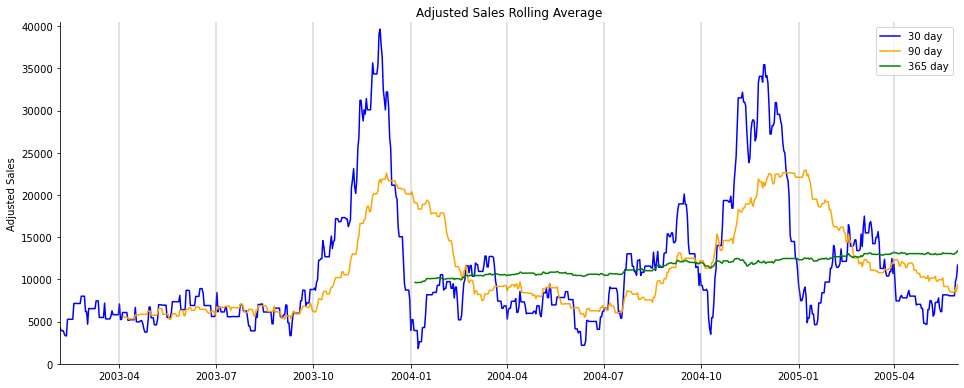

In [91]:
metric = 'adj_sales'
labels_metric[metric] = 'Adjusted Sales'

plot_lines(metric, period_start=2, period_end=10)

## Review Cleaned Data

The data set has been checked for missing values, errors have been corrected, and forecasts into the immedate future have been predicted. Before analyzing where the company might want to go next, lets take a look at where the company is at the moment.

In [92]:
data_summary = data.loc[data['status'].isin(['Shipped', 'Resolved', 'Disputed', 'In Process']),:]
data_summary

,order,quantity,price,line,sales,date,status,qtr,month,year,...,address2,city,state,postal,country,territory,cont_name_last,cont_name_first,size,adj_sales
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,AMER,Yu,Kwai,Small,2871.00
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2765.90
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,AMER,Young,Julie,Medium,3746.70
4,10159,49,106.23,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,San Francisco,CA,94016,USA,AMER,Brown,Julie,Medium,5205.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,10337,42,97.16,5,4080.72,2004-11-21,Shipped,4,11,2004,...,Suite 750,NYC,NY,10022,USA,AMER,Hernandez,Maria,Medium,4080.72
2818,10350,20,112.22,15,2244.40,2004-12-02,Shipped,4,12,2004,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,2244.40
2819,10373,29,137.19,1,3978.51,2005-01-31,Shipped,1,1,2005,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,3978.51
2820,10386,43,125.99,4,5417.57,2005-03-01,Resolved,1,3,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,5417.57


In [93]:
def add_commas(x:int, currency=False)->str:
    """Converts an integer into a string formatted with commas as currency in $"""
    x = int(x) # round to whole number
    x = list(str(x))
    if len(x) > 3:
        commas = len(x) // 3
        loc = 0
        for c in range(commas):
            loc += -3
            x.insert(loc, ',')
            loc += -1
        return '$' + ''.join(x) if currency else ''.join(x)
    else: 
        return '$' + ''.join(x) if currency else ''.join(x)

In [94]:
def pct_delta(start:np.number, end:np.number, round=2, commas=False, string=False):
    """Calculate percent change between two numbers"""
    if string:
        if commas:
            return add_commas(int(((float(end) - float(start)) / float(np.abs(start)) * 100))) + '%' 
        else:
            return str(float(np.round(((float(end) - float(start)) / float(np.abs(start)) * 100), round))) + '%' 
    else:
        return float(np.round((float(end) - float(start)) / float(np.abs(start)), round))

In [95]:
# Filter data
sales_delta = data_summary[cols_prod]
customer_data = data_summary[cols_cust]

In [96]:
# Calculate gross revenue highlights
gross_rev = int(data_summary["adj_sales"].sum())

In [97]:
# Calculate daily sales highlights
daily_sales_early = int(data_daily_roll.loc[(data_daily_roll['adj_sales_roll_365'] != 0).idxmax(), 'adj_sales_roll_365'])
daily_sales_early_date = (data_daily_roll['adj_sales_roll_365'] != 0).idxmax().strftime("%m/%d/%y")
daily_sales_now = int(data_daily_roll.loc[:,'adj_sales_roll_365'].tail(1))
daily_sales_now_date = data_daily_roll['adj_sales_roll_365'].index[-1].strftime("%m/%d/%y")

In [98]:
data_daily_roll.head()

,orders,orders_roll_7,orders_roll_30,orders_roll_90,orders_roll_365,orders_yoy_roll_7,orders_yoy_roll_30,orders_yoy_roll_90,orders_yoy_roll_365,adj_sales,adj_sales_roll_7,adj_sales_roll_30,adj_sales_roll_90,adj_sales_roll_365
2003-01-06,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12133.25,0.0,0.0,0.0,0.0
2003-01-07,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2003-01-08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2003-01-09,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11432.34,0.0,0.0,0.0,0.0
2003-01-10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6864.05,0.0,0.0,0.0,0.0


In [99]:
daily_orders_early = data_daily_roll.loc[(data_daily_roll['orders_roll_365'] != 0).idxmax(), 'orders_roll_365']
daily_orders_now = data_daily_roll['orders_roll_365'][-1]

In [100]:
print('===' * 30)
print(f'Executive Summary')
print('===' * 30)
print(f'- Sales data between {data_summary["date"].min().strftime("%m/%d/%y")} and {data_summary["date"].max().strftime("%m/%d/%y")}.')
print(f'- Gross Revenue: {add_commas(gross_rev, True)}.')
print(f'- {order_status.loc[["Shipped", "In Process", "Resolved", "Disputed"]].sum()} orders with an average order price of {add_commas(int(data_summary.groupby("order")["adj_sales"].sum().mean()), True)}.')
print(f'- {add_commas(data_summary.shape[0])} product sales with an average of {int(data_summary["quantity"].mean())} units per sale at {add_commas(int(sum(data_summary["adj_sales"]) / sum(data_summary["quantity"])), True)} per unit.')
print(f'- Order dispute rate is {np.round(dispute_rate * 100, 2)}% with a dispute resolution rate of {np.round((1 - cancel_rate) * 100, 2)}%.')
print(f'- Between {daily_sales_early_date} and {daily_sales_now_date} average daily gross revenue improved from {add_commas(daily_sales_early, currency=True)} to {add_commas(daily_sales_now, currency=True)} (+{pct_delta(daily_sales_early, daily_sales_now, round=1, string=True)}).')
print(f'- Between {daily_sales_early_date} and {daily_sales_now_date} average orders/day improved from {np.round(daily_orders_early, 2)} to {np.round(daily_orders_now, 2)} (+{pct_delta(daily_orders_early, daily_orders_now, round=1, string=True)}).')

Executive Summary
- Sales data between 01/06/03 and 05/31/05.
- Gross Revenue: $9,621,086.
- 299 orders with an average order price of $32,177.
- 2,719 product sales with an average of 34 units per sale at $101 per unit.
- Order dispute rate is 2.72% with a dispute resolution rate of 50.0%.
- Between 01/05/04 and 05/31/05 average daily gross revenue improved from $9,651 to $13,383 (+38.7%).
- Between 01/05/04 and 05/31/05 average orders/day improved from 0.28 to 0.42 (+48.1%).


In [101]:
data[cols_prod].describe()

,order,quantity,price,line,sales,qtr,month,year,msrp
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,101.159440,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,42.155563,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,127.100000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


## Export Cleaned Data

In [102]:
data.to_csv('./data/data_clean.csv', index=False, sep=',')
data_daily_roll.reset_index(drop=False).to_csv('./data/data_daily.csv', sep=',', index=False)